In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Reading Data


In [4]:
%cd "../"
%cd data


c:\Users\johny\ChurnProject\Customer-Churn
c:\Users\johny\ChurnProject\Customer-Churn\data


In [5]:
raw_df = pd.read_csv("rawdata.csv")
raw_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Basic Information About Columns

In [6]:
def column_informations(df):
    column_data = []
    [column_data.append([str(df[col].dtype), df[col].unique(), len(df[col].unique())]) for col in df.columns ]
    result_df = pd.DataFrame(data=column_data, index=df.columns, columns=['dtype', 'unique_values', 'cardinality'])
    return result_df

In [7]:
column_informations(raw_df)

,dtype,unique_values,cardinality
customerID,object,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...",7043
gender,object,"[Female, Male]",2
SeniorCitizen,int64,"[0, 1]",2
Partner,object,"[Yes, No]",2
Dependents,object,"[No, Yes]",2
tenure,int64,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...",73
PhoneService,object,"[No, Yes]",2
MultipleLines,object,"[No phone service, No, Yes]",3
InternetService,object,"[DSL, Fiber optic, No]",3
OnlineSecurity,object,"[No, Yes, No internet service]",3


In [8]:
raw_df["TotalCharges"] = pd.to_numeric(arg=raw_df["TotalCharges"], errors="coerce")

In [9]:
column_informations(raw_df)


,dtype,unique_values,cardinality
customerID,object,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...",7043
gender,object,"[Female, Male]",2
SeniorCitizen,int64,"[0, 1]",2
Partner,object,"[Yes, No]",2
Dependents,object,"[No, Yes]",2
tenure,int64,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...",73
PhoneService,object,"[No, Yes]",2
MultipleLines,object,"[No phone service, No, Yes]",3
InternetService,object,"[DSL, Fiber optic, No]",3
OnlineSecurity,object,"[No, Yes, No internet service]",3


In [10]:
def analyzing_nan_values(df):
    return_data = []
    [return_data.append([df[col].isna().sum(), df.index[df[col].isna()].tolist()]) for col in df.columns]
    result_df = pd.DataFrame(return_data, index=df.columns, columns=['nan_count', 'nan_indices'])
    return result_df

In [11]:
analyzing_nan_values(raw_df)

,nan_count,nan_indices
customerID,0,[]
gender,0,[]
SeniorCitizen,0,[]
Partner,0,[]
Dependents,0,[]
tenure,0,[]
PhoneService,0,[]
MultipleLines,0,[]
InternetService,0,[]
OnlineSecurity,0,[]


In [12]:
nan_id = analyzing_nan_values(raw_df)["nan_indices"].loc["TotalCharges"]

In [13]:
raw_df.iloc[nan_id]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [14]:
raw_df.dropna(inplace=True)

In [15]:
analyzing_nan_values(raw_df)

,nan_count,nan_indices
customerID,0,[]
gender,0,[]
SeniorCitizen,0,[]
Partner,0,[]
Dependents,0,[]
tenure,0,[]
PhoneService,0,[]
MultipleLines,0,[]
InternetService,0,[]
OnlineSecurity,0,[]


In [16]:
raw_df.drop(columns="customerID", inplace=True)

In [17]:
# Assuming 'df' is your DataFrame
columns_to_check = ["OnlineSecurity", "OnlineBackup", "TechSupport", "StreamingTV", "StreamingMovies"]
is_different = raw_df[raw_df['InternetService'] == "No"][columns_to_check]

print("Are there values different than 'No internet service' in the specified columns?")
print(is_different.value_counts())

Are there values different than 'No internet service' in the specified columns?
OnlineSecurity       OnlineBackup         TechSupport          StreamingTV          StreamingMovies    
No internet service  No internet service  No internet service  No internet service  No internet service    1520
Name: count, dtype: int64


# Visualizations

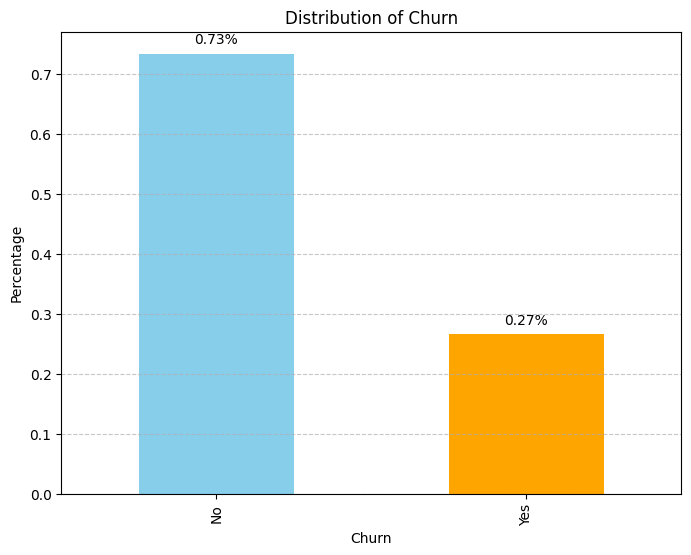

In [18]:
churn_distribution = raw_df['Churn'].value_counts(normalize=True) 


colors = ['skyblue', 'orange']
ax = churn_distribution.plot(kind='bar', figsize=(8, 6), color=colors)
plt.title("Distribution of Churn")
plt.xlabel("Churn")
plt.ylabel("Percentage")
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding grid lines

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

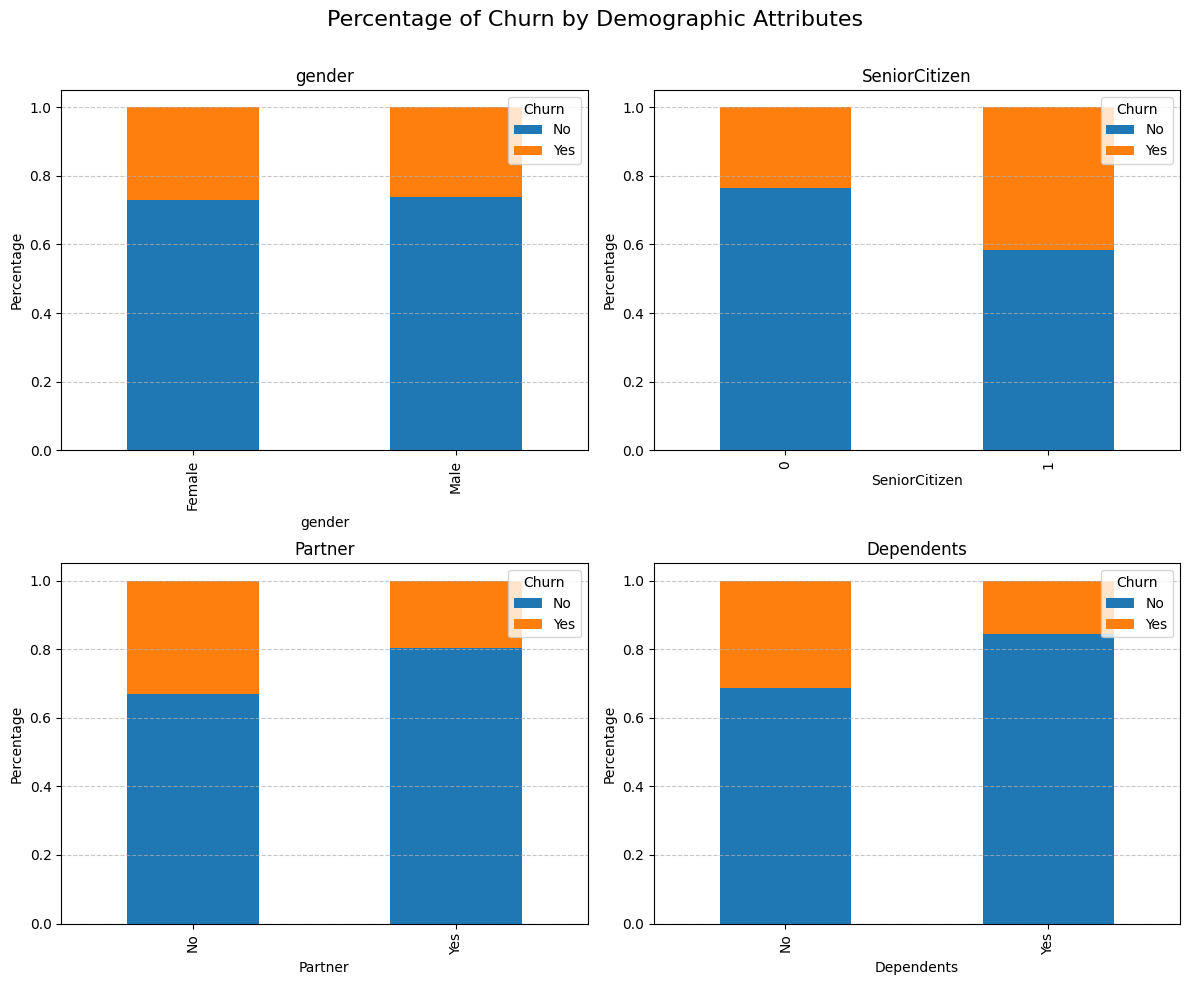

In [19]:
attributes = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

# Calculate percentage of churn for each category of each attribute
churn_percentages = []
for attribute in attributes:
    grouped = raw_df.groupby(attribute)['Churn'].value_counts(normalize=True).unstack()
    churn_percentages.append(grouped)

# Create subplots for each attribute
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle("Percentage of Churn by Demographic Attributes", fontsize=16)

for idx, attribute in enumerate(attributes):
    ax = axes[idx // 2, idx % 2]
    churn_percentages[idx].plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(attribute)
    ax.set_xlabel(attribute)
    ax.set_ylabel("Percentage")
    ax.legend(title="Churn", loc='upper right')
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In [46]:
def attributes_vs_target(df, attributes, target_column, fig_size=(8, 20)):
    target_percentages = []
    for attribute in attributes:
        grouped = df.groupby(attribute)[target_column].value_counts(normalize=True).unstack()
        target_percentages.append(grouped)

    # Create subplots for each attribute
    fig, axes = plt.subplots(nrows=len(attributes), ncols=1, figsize=fig_size)
    fig.suptitle(f"Percentage of {target_column} by Demographic Attributes", fontsize=16)

    for idx, attribute in enumerate(attributes):
        ax = axes[idx]
        target_percentages[idx].plot(kind='bar', stacked=True, ax=ax)
        ax.set_title(attribute)
        ax.set_xlabel(attribute)
        ax.set_ylabel("Percentage")
        ax.legend(title=target_column, loc='upper right')  # Use target_column here
        ax.grid(axis='y', linestyle='--', alpha=0.7)

    #plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()





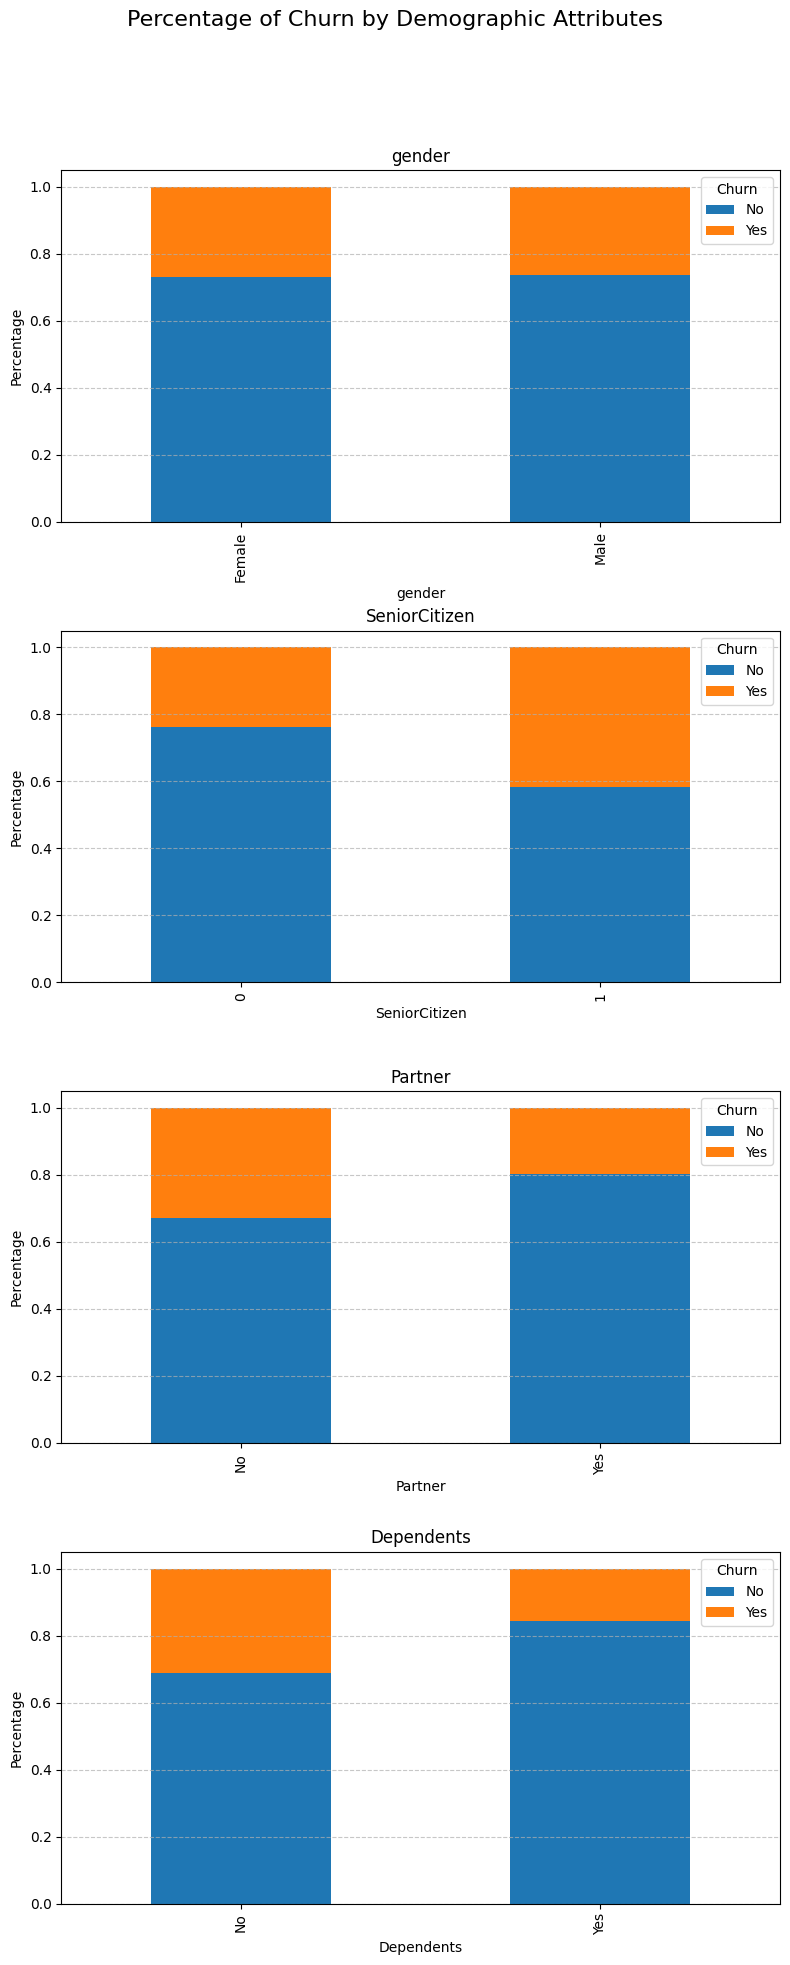

In [23]:

attributes = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
attributes_vs_target(raw_df, attributes, "Churn")

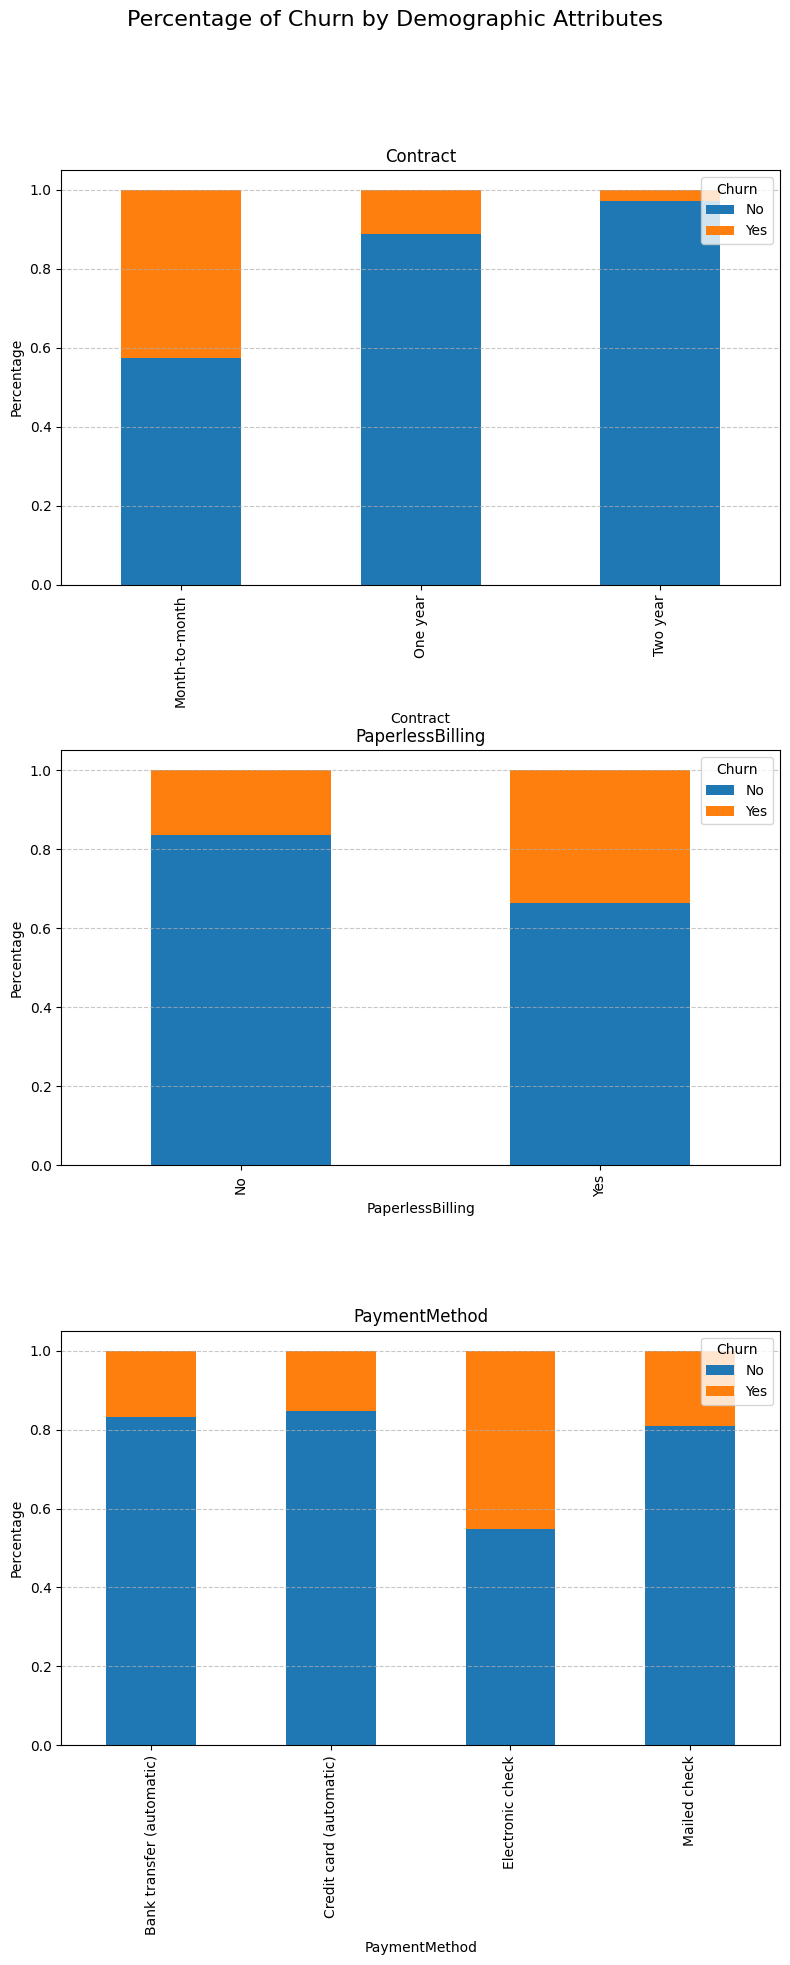

In [24]:
attributes = ['Contract', 'PaperlessBilling', 'PaymentMethod']
attributes_vs_target(raw_df, attributes, "Churn")

In [33]:
def numeric_attribute_vs_target(df, numeric_attribute, target_column, num_bins=10):
    target_percentages = []
    df_copy = df.copy()
    for attribute in attributes:
        df_copy['bins'] = pd.cut(df_copy[attribute], bins=num_bins)
        grouped = df_copy.groupby('bins')[target_column].value_counts(normalize=True).unstack()
        target_percentages.append(grouped)

    
    # Create subplots for each attribute
    fig, axes = plt.subplots(nrows=len(attributes), ncols=1, figsize=(8, 20))
    fig.suptitle(f"Percentage of {target_column} by Demographic Attributes", fontsize=16)

    for idx, attribute in enumerate(attributes):
        ax = axes[idx]
        target_percentages[idx].plot(kind='bar', stacked=True, ax=ax)
        ax.set_title(attribute)
        ax.set_xlabel(attribute)
        ax.set_ylabel("Percentage")
        ax.legend(title=target_column, loc='upper right')  # Use target_column here
        ax.grid(axis='y', linestyle='--', alpha=0.7)


    plt.tight_layout()
    plt.show()

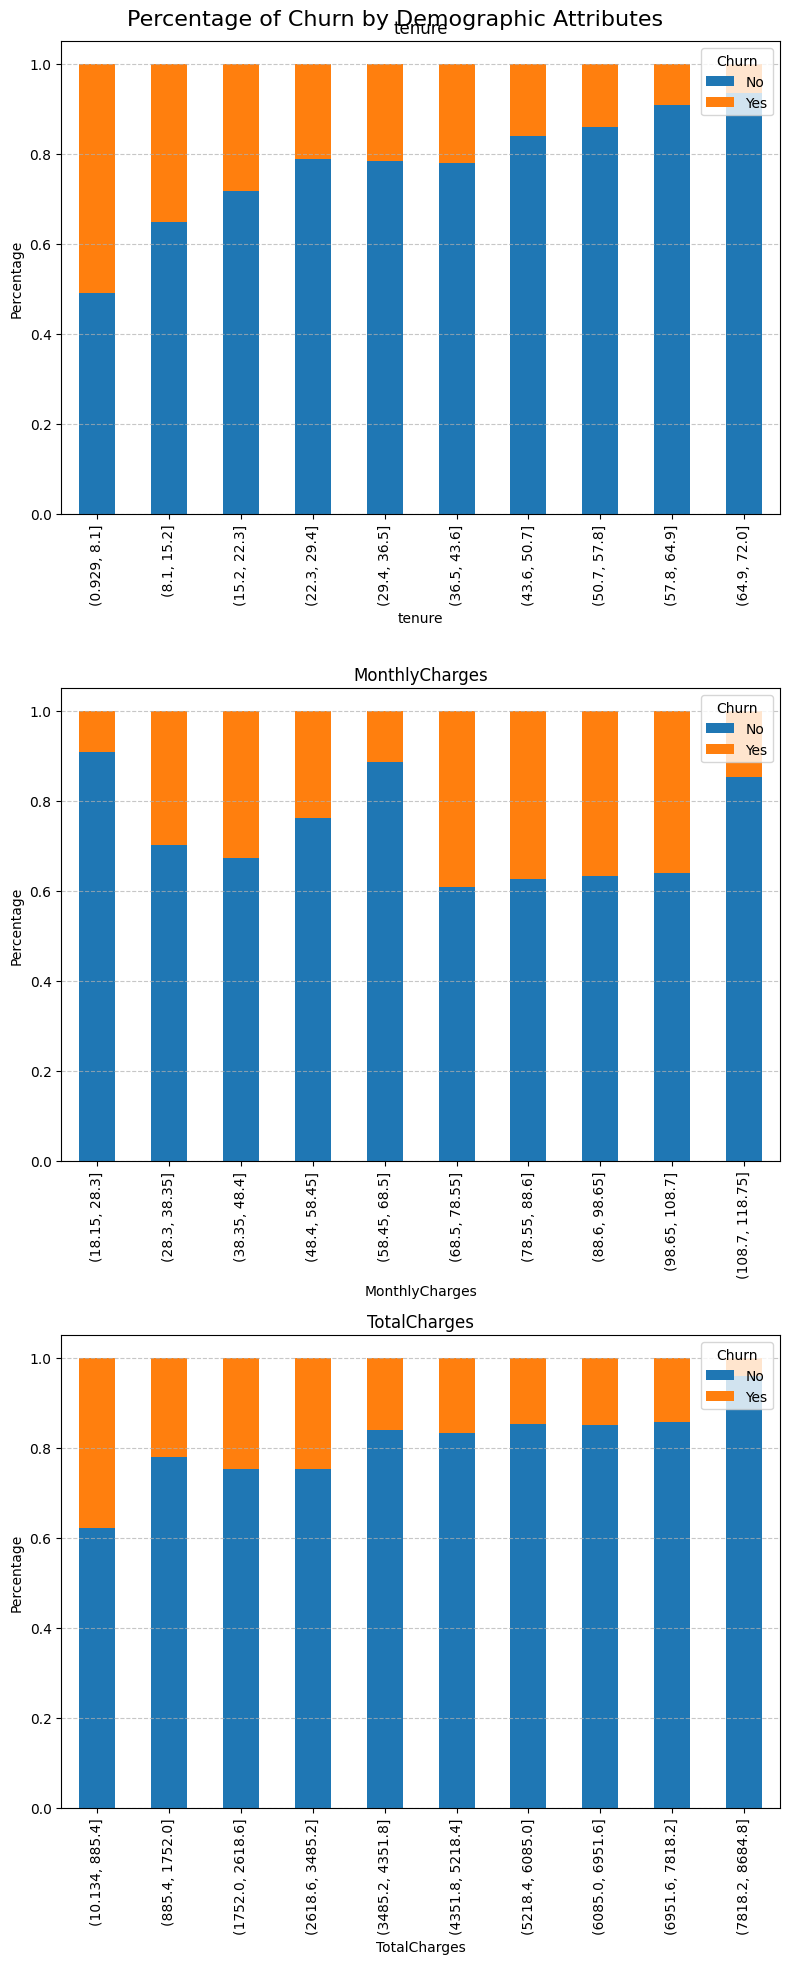

In [39]:
attributes = ['tenure', 'MonthlyCharges', 'TotalCharges']
numeric_attribute_vs_target(raw_df, attributes, "Churn")


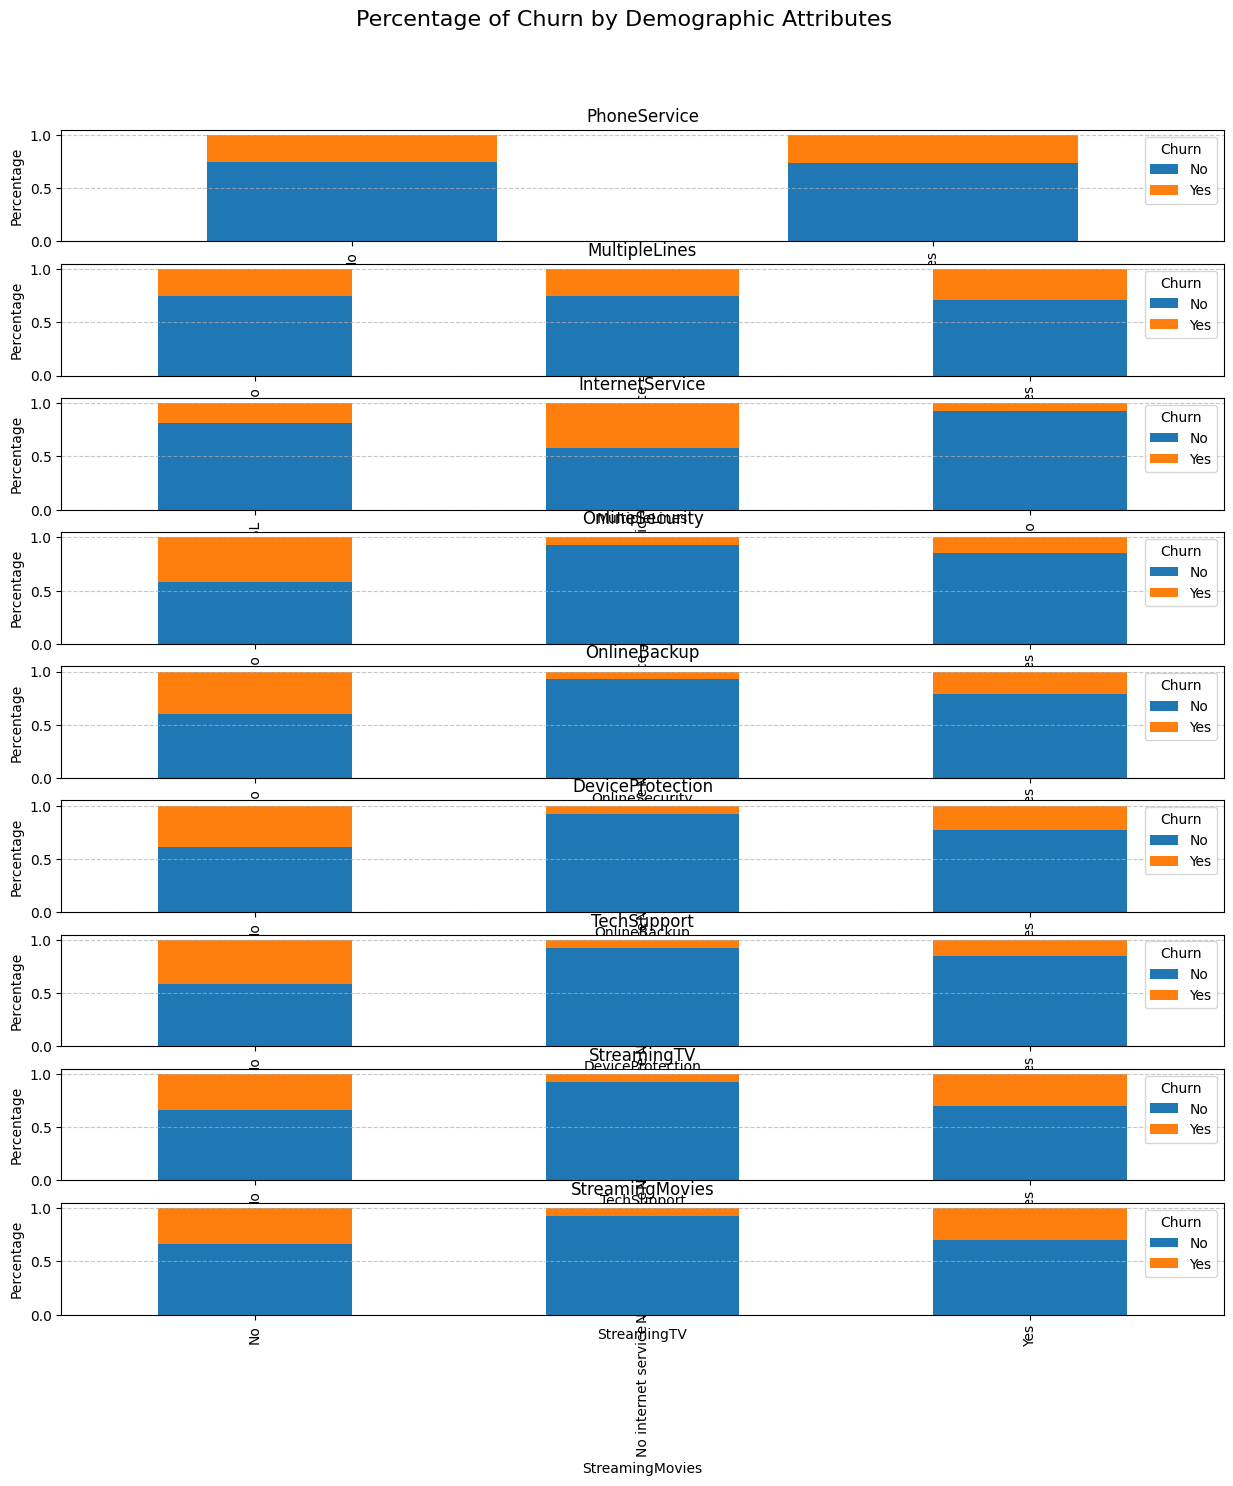

In [47]:
attributes = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
attributes_vs_target(raw_df, attributes, "Churn", (15, 15))

In [48]:
raw_df.to_csv('cleaned_data.csv', index=False)